In [51]:
import pandas as pd
import fnmatch
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time
from sklearn.model_selection import train_test_split

In [52]:
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Soil_Lab_Results - Sheet1.csv')
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [53]:
Sample_ID = Lab_tested_data.iloc[:,0]
PH_Value = Lab_tested_data.iloc[:,2]

In [59]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[800:1100,800:1100]
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result];
        if len(Result) > 1:
            Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
            Id_1_index = Result[0]
            Id_2_index = Result[1]
            print(id)
            Labels.append([filename,img,(PH_Value[Id_1_index]+PH_Value[Id_2_index])/2])
        else:
            continue
    return Labels

In [60]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [63]:
X = []
Y = []
for data in dataset:
    X.append(data[1])
    Y.append(data[2])
print(Y)

[7.95, 7.95, 7.9, 7.9, 7.75, 7.75, 7.9, 7.9, 7.75, 7.75, 8.2, 8.2, 7.75, 7.75, 7.7, 7.7, 7.8, 7.8, 7.85, 7.85, 7.9, 7.9, 7.9, 7.9, 7.95, 7.95, 8.0, 8.0, 7.85, 7.85, 7.65, 7.65, 7.95, 7.95, 7.85, 7.85, 7.65, 7.65, 7.75, 7.75, 8.05, 8.05, 7.7, 7.7, 8.0, 8.0, 7.85, 7.85, 8.2, 8.2, 7.75, 7.75, 7.75, 7.75, 7.8, 7.8, 7.85, 7.85, 8.149999999999999, 8.149999999999999, 7.85, 7.85, 7.9, 7.9, 7.800000000000001, 7.800000000000001, 7.95, 7.95, 7.9, 7.9, 8.0, 8.0, 7.6, 7.6, 7.9, 7.9, 7.6, 7.6, 7.85, 7.85, 7.800000000000001, 7.800000000000001, 8.0, 8.0, 7.95, 7.95, 7.65, 7.65, 8.05, 8.05, 7.85, 7.85, 7.7, 7.7, 7.95, 7.95, 8.05, 8.05, 7.95, 7.95, 7.9, 7.9, 7.880000000000001, 7.880000000000001, 8.05, 8.05, 7.85, 7.85, 8.05, 8.05, 7.85, 7.85, 7.7, 7.7, 7.7, 7.7, 7.65, 7.65, 7.75, 7.75, 7.75, 7.75, 7.65, 7.65, 7.65, 7.65, 7.75, 7.75, 7.7, 7.7, 7.75, 7.75, 7.55, 7.55, 7.9, 7.9, 8.055, 8.055, 7.7, 7.7, 7.75, 7.75, 7.95, 7.95, 7.45, 7.45, 7.7, 7.7, 7.45, 7.45, 7.75, 7.75, 7.95, 7.95, 8.25, 8.25, 8.0, 8.0, 7

In [64]:
img_size = 300
X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X[0].shape)
Y = np.array(Y)
print(Y)

(300, 300, 3)
[7.95  7.95  7.9   7.9   7.75  7.75  7.9   7.9   7.75  7.75  8.2   8.2
 7.75  7.75  7.7   7.7   7.8   7.8   7.85  7.85  7.9   7.9   7.9   7.9
 7.95  7.95  8.    8.    7.85  7.85  7.65  7.65  7.95  7.95  7.85  7.85
 7.65  7.65  7.75  7.75  8.05  8.05  7.7   7.7   8.    8.    7.85  7.85
 8.2   8.2   7.75  7.75  7.75  7.75  7.8   7.8   7.85  7.85  8.15  8.15
 7.85  7.85  7.9   7.9   7.8   7.8   7.95  7.95  7.9   7.9   8.    8.
 7.6   7.6   7.9   7.9   7.6   7.6   7.85  7.85  7.8   7.8   8.    8.
 7.95  7.95  7.65  7.65  8.05  8.05  7.85  7.85  7.7   7.7   7.95  7.95
 8.05  8.05  7.95  7.95  7.9   7.9   7.88  7.88  8.05  8.05  7.85  7.85
 8.05  8.05  7.85  7.85  7.7   7.7   7.7   7.7   7.65  7.65  7.75  7.75
 7.75  7.75  7.65  7.65  7.65  7.65  7.75  7.75  7.7   7.7   7.75  7.75
 7.55  7.55  7.9   7.9   8.055 8.055 7.7   7.7   7.75  7.75  7.95  7.95
 7.45  7.45  7.7   7.7   7.45  7.45  7.75  7.75  7.95  7.95  8.25  8.25
 8.    8.    7.75  7.75  7.85  7.85  7.65  7.65  7.65  7

In [65]:
len(X)

701

In [66]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
          
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(200))
model.add(Activation('relu'))
 
model.add(Dense(1))
model.add(Activation('linear'))

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, Y)
print(X_train.shape)

(525, 300, 300, 3)


In [69]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, validation_split=0.4)
predictions = model.predict(X_val)

Epoch 1/300
10/10 [==============================] - 3s 250ms/step - loss: 580.0361 - mse: 580.0361 - mae: 12.7819 - val_loss: 42.2355 - val_mse: 42.2355 - val_mae: 6.3256
Epoch 2/300
 5/10 [==============>...............] - ETA: 0s - loss: 37.0010 - mse: 37.0010 - mae: 5.7335

KeyboardInterrupt: 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


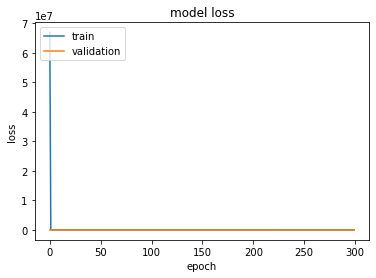

In [70]:
import matplotlib.pyplot as plt 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

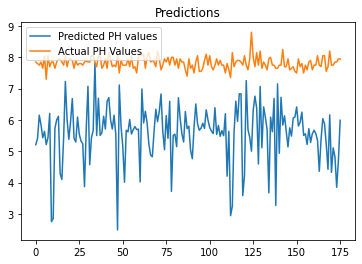

In [71]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted PH values', 'Actual PH Values'], loc='upper left')
plt.show()

In [72]:
dataset[0][1].shape

(300, 300, 3)

In [73]:
dataset[0][2]

7.95

In [74]:
import tensorflow as tf

In [75]:
tf.test.gpu_device_name()

'/device:GPU:0'